In [1]:
import os, sys
import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [2]:

# Get theconda create --name talib python=3.9 current working directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)


d:\Projects\10ac\update\Financial-News-and-Stock-Price-Integration\notebooks
d:\Projects\10ac\update\Financial-News-and-Stock-Price-Integration


In [3]:
import pandas as pd

# read the CSV 
data = pd.read_csv('../data/raw_analyst_ratings.csv')


In [4]:
from scripts.HeadlineStatistics import HeadlineStatistics

In [5]:
headline_stats = HeadlineStatistics(data, 'headline')

In [6]:
stats = headline_stats.calculate_statistics()
print(stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


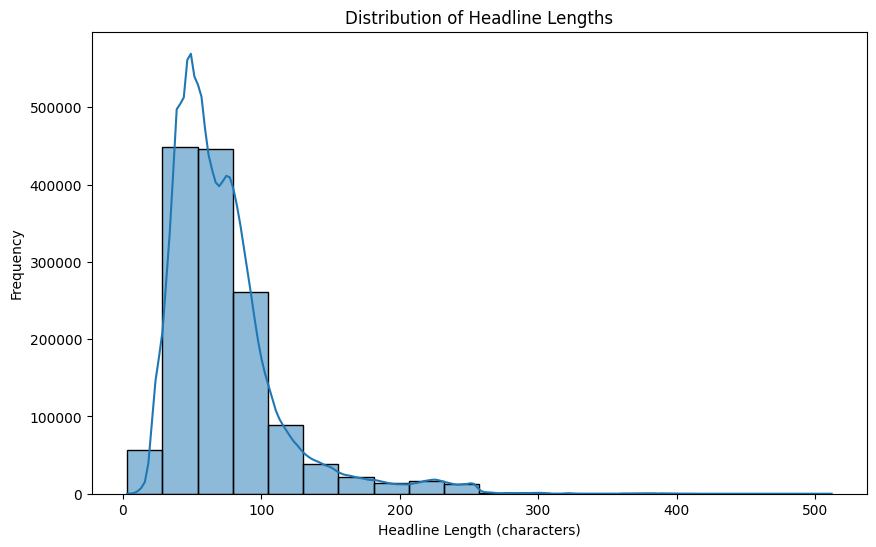

In [7]:
# Plot the distribution of headline lengths
headline_stats.plot_length_distribution()

In [8]:
from scripts.sentimentAnalyzer import SentimentAnalyzer

In [9]:
analyzer = SentimentAnalyzer(data)

In [11]:
print(data['date'].min())
print(data['date'].max())

2011-04-27 21:01:48-04:00
2020-06-11 17:12:35-04:00


In [12]:
analyzer = SentimentAnalyzer(data,publisher_column='publisher')

              publisher  article_count
0         Paul Quintaro         228373
1            Lisa Levin         186979
2     Benzinga Newsdesk         150484
3         Charles Gross          96732
4         Monica Gerson          82380
...                 ...            ...
1029          MoneyGeek              1
1030             muathe              1
1031      Robert Morris              1
1032    LeftCoastHedgie              1
1033     Jeremie Capron              1

[1034 rows x 2 columns]


d:\Projects\10ac\update\Financial-News-and-Stock-Price-Integration\scripts\sentimentAnalyzer.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_counts, x='article_count', y=self.publisher_column, palette='viridis')


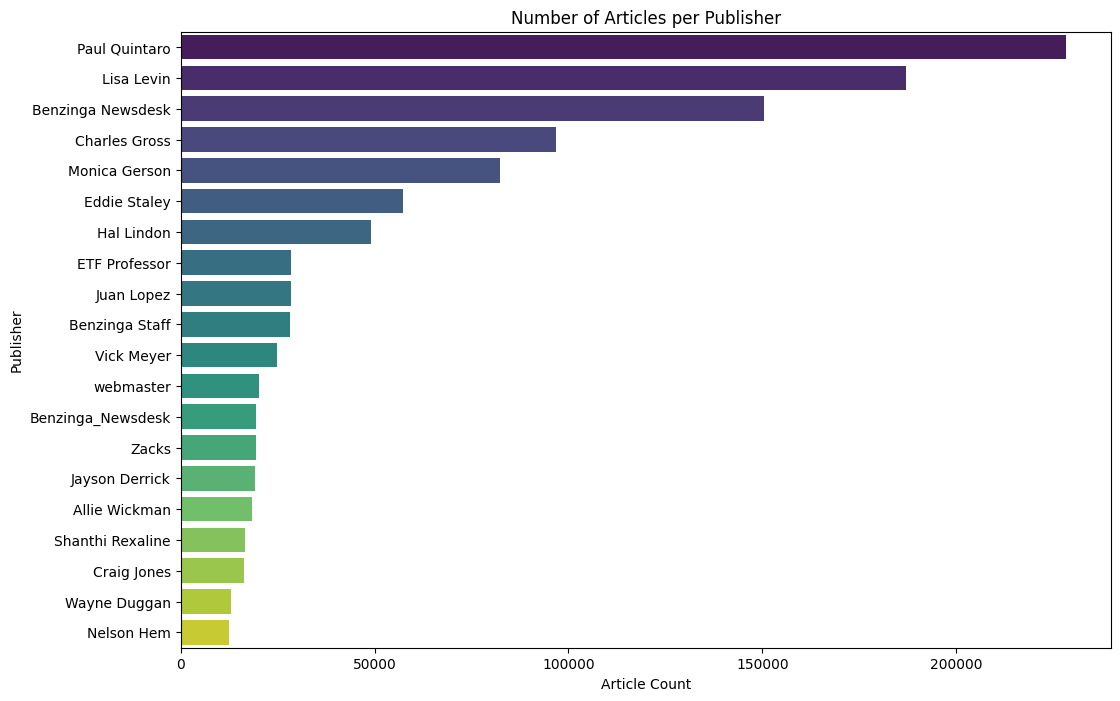

In [13]:
publisher_counts = analyzer.count_articles_per_publisher()
print(publisher_counts)

# Plot the number of articles per publisher
analyzer.plot_publisher_activity(20)

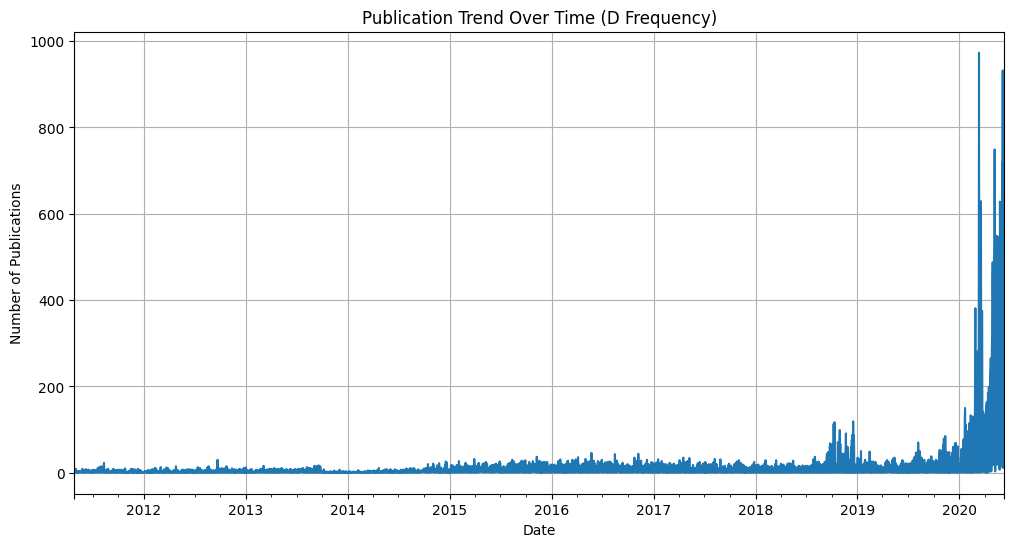

In [14]:
analyzer.plot_publication_trend(freq='D')

In [18]:
peak_days = analyzer.detect_peak_days(top_n=10)
print(peak_days)

                       date  count
0 2020-03-12 00:00:00-04:00    973
1 2020-06-05 00:00:00-04:00    932
2 2020-06-10 00:00:00-04:00    806
3 2020-06-09 00:00:00-04:00    804
4 2020-06-08 00:00:00-04:00    765
5 2020-05-07 00:00:00-04:00    749
6 2020-06-03 00:00:00-04:00    720
7 2020-03-19 00:00:00-04:00    629
8 2020-05-26 00:00:00-04:00    628
9 2020-05-13 00:00:00-04:00    549


d:\Projects\10ac\update\Financial-News-and-Stock-Price-Integration\scripts\sentimentAnalyzer.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='coolwarm')


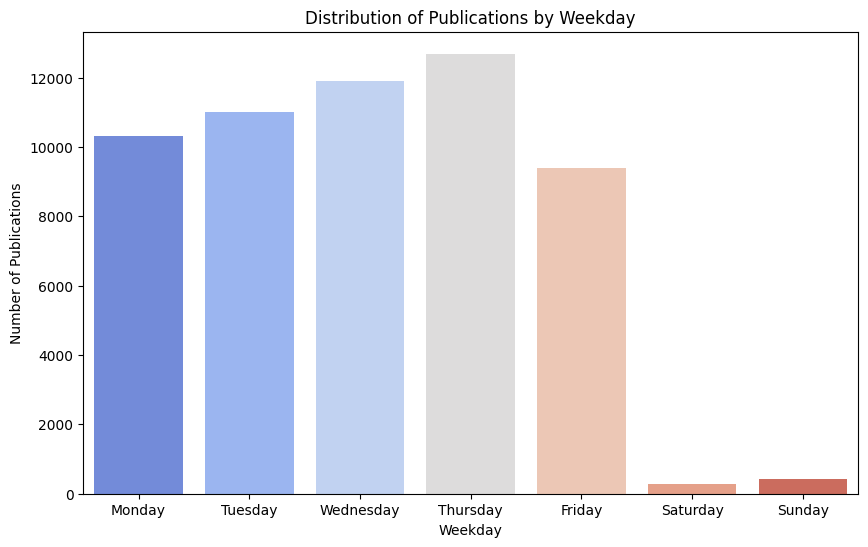

In [19]:
analyzer.plot_weekday_distribution()

d:\Projects\10ac\update\Financial-News-and-Stock-Price-Integration\scripts\sentimentAnalyzer.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='magma')


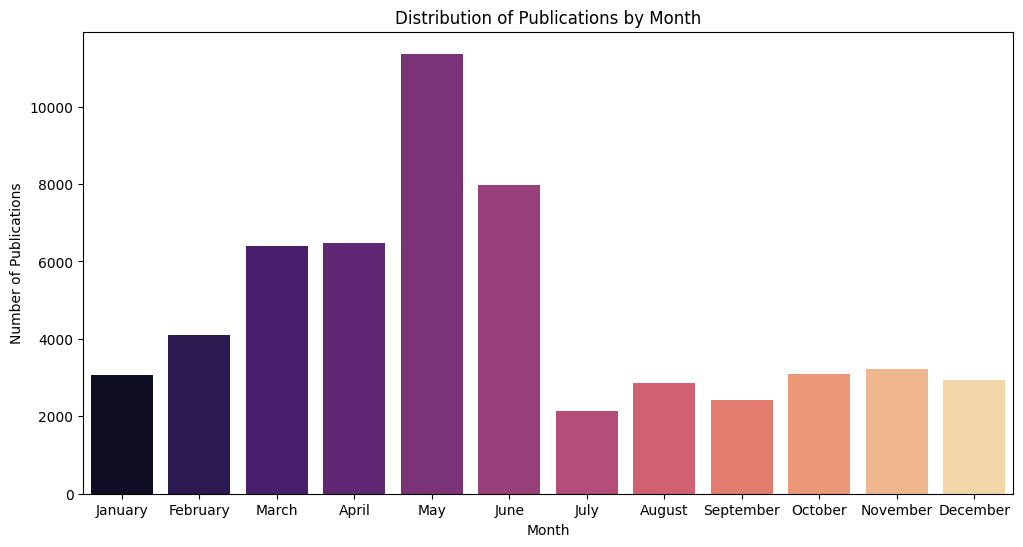

In [20]:
analyzer.plot_monthly_distribution()

In [21]:
result_df = analyzer.calculate_sentiment()


In [ ]:
from scripts.histogram import Histogram

In [ ]:
histogram_plotter=Histogram(result_df)
histogram_plotter.plot_histogram("sentiment","Sentiment","Frequency")

In [25]:
result_df['sentiment'].value_counts()

sentiment
Neutral     1046537
Positive     269878
Negative      90913
Name: count, dtype: int64

In [15]:
from scripts.topicModeling import TopicModeling

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
nlp_analyzer = TopicModeling(sentiment_data)


NameError: name 'sentiment_data' is not defined

In [ ]:
keywords_df = nlp_analyzer.extract_keywords(ngram_range=(1, 2), top_n=10)

In [ ]:
keywords_df.head(25)


,ngram,count
1995856,vs,162099
1794097,stocks,161776
785059,est,140604
778744,eps,128897
1196381,market,120558
1712209,shares,114313
1581554,reports,108710
1946361,update,91723
741372,earnings,87399
1648646,sales,79645


In [ ]:
topics = nlp_analyzer.perform_topic_modeling(num_topics=3, num_words=5)

In [ ]:
AAP=